# Self-assembling chains
This review is based on the article,

T. Mashiko, Phys. Rev. E ${\bf 78}$, 011106 (2008).

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
%config InlineBackend.figure_format='retina'

In [68]:
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [69]:
# function to propose next step
def step(ox,oy):
    """L,R,U,D=0,1,2,3"""
    site_rnd=np.random.randint(0,4)
    if site_rnd==0:
        ox-=1
    elif site_rnd==1:
        ox+=1
    elif site_rnd==3:
        oy+=1
    else:
        oy-=1
    return ox,oy

***
# Flexible walkers

In [70]:
def move(fcws):
    mob=0
    for fcw in fcws:
        nx1,ny1=step(fcw[-1][0],fcw[-1][1])
        if grid[nx1%W,ny1%W]==0:
            mob+=1
            grid[fcw[-3][0],fcw[-3][1]]=0
            fcw[-3]=fcw[-2]
            fcw[-2]=fcw[-1]
            fcw[-1]=(nx1%W,ny1%W)
    return fcws,mob 

In [71]:
def initialize(grid):
    fcws=[]
    # to avoid more than N particles
    count=0
    while count<l:
        count+=1
        a=np.random.randint(0,W)
        b=np.random.randint(0,W)
        if grid[a,b]!=1:
            grid[a,b]=1
            grid[a, (b+1)%W]=1
            
            grid[a, (b+2)%W]=1
            fcws.append([(a,b),(a,(b+1)%W),(a,(b+2)%W)])
    return fcws,grid

In [76]:
nList=np.arange(1,10000,500)
mobList=[]
for n in nList:
    W=100 # width of the lattice
    N=n*3 # number of particles
    l=N/3 # number of snakes
    grid=np.zeros(shape=(W,W)) # empty lattice
    fcws,grid=initialize(grid)
    for run in range(10000):
    
        fcws,mob=move(fcws)
        
        for fcw in fcws:
            for block in fcw:
                grid[block]=1
    mobList.append(mob/n)  

In [79]:
mob3=mobList

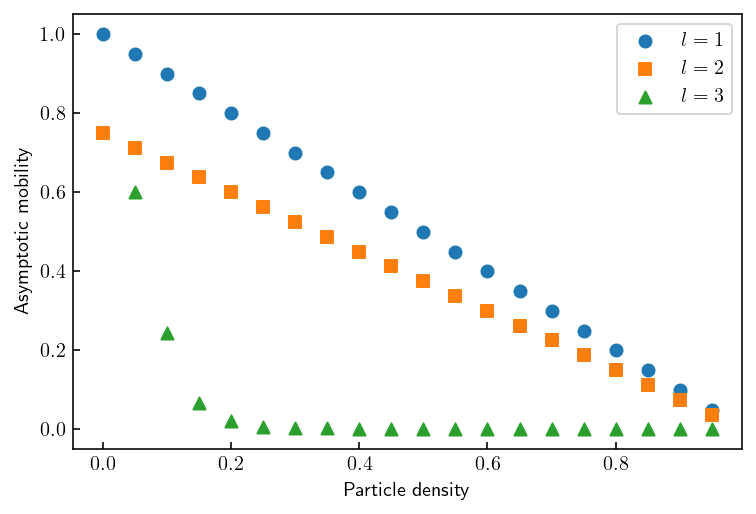

In [81]:
plt.scatter(nList/10000,1-(nList/10000),marker='o',label='$l=1$')
plt.scatter(nList/10000,(1-(nList/10000))*3/4,marker='s',label='$l=2$')
plt.scatter(nList[1:]/10000,mob3[1:],marker='^',label='$l=3$')
plt.xlabel('Particle density')
plt.ylabel('Asymptotic mobility')
plt.legend()

In [124]:
grid0=grid

In [128]:
grid1000=grid

In [133]:
grid2000=grid

In [139]:
grid3000=grid

In [144]:
grid10000=grid

In [149]:
grid100000=grid

Text(0.5, 1.0, '$t=100,000$')

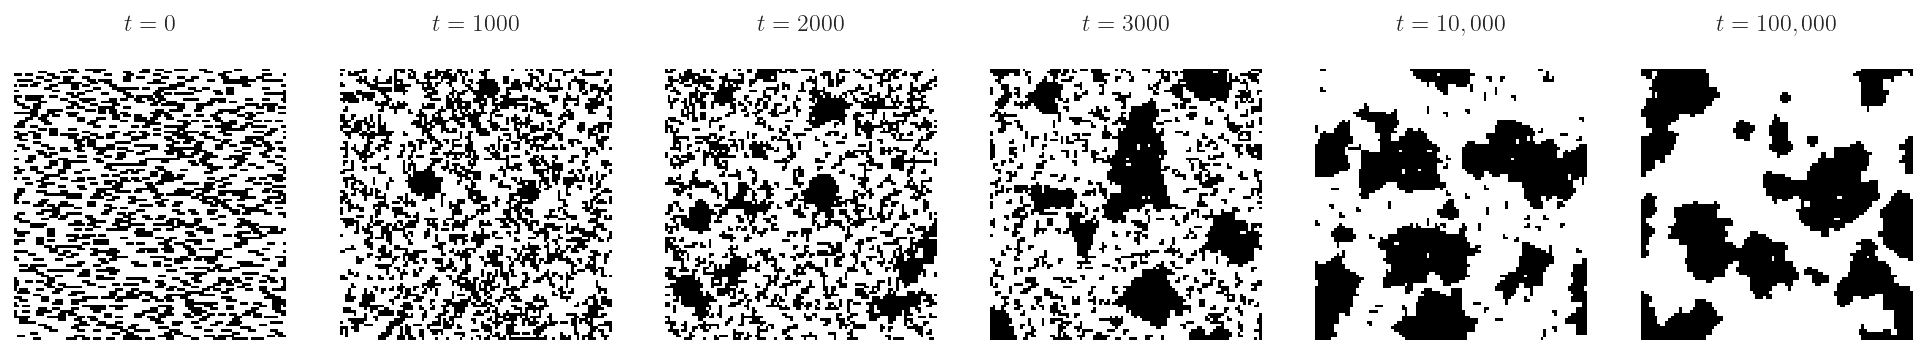

In [162]:
fig,ax=plt.subplots(1,6,figsize=(17,8))
ax[0].matshow(grid0,cmap='binary')
ax[1].matshow(grid1000,cmap='binary')
ax[2].matshow(grid2000,cmap='binary')
ax[3].matshow(grid3000,cmap='binary')
ax[4].matshow(grid10000,cmap='binary')
ax[5].matshow(grid100000,cmap='binary')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
ax[5].axis('off')
ax[0].set_title('$t=0$')
ax[1].set_title('$t=1000$')
ax[2].set_title('$t=2000$')
ax[3].set_title('$t=3000$')
ax[4].set_title('$t=10,000$')
ax[5].set_title('$t=100,000$')

***